In [1]:
import os
from pathlib import Path

NOTEBOOK_PATH: Path = Path(os.path.abspath(''))

DATA_PATH: Path = NOTEBOOK_PATH.parent.joinpath('data')

PATH_FOR_RESULT: Path = NOTEBOOK_PATH.joinpath('RESULT')

if not PATH_FOR_RESULT.exists():
    PATH_FOR_RESULT.mkdir()

print(f'当前运行目录：{NOTEBOOK_PATH}')
print(f'当前数据目录：{DATA_PATH}')

当前运行目录：D:\Development\Python\InvestmentWorkshop\notebook
当前数据目录：D:\Development\Python\InvestmentWorkshop\data


# 缠论 A-01

A 系列仅使用 pandas 读取数据，不用于计算。

## 准备

### 引用模块

In [2]:
from typing import List

import pandas as pd

from utility import (
    get_available_datafile_name,
    load_csv_as_dataframe,
    get_saved_filename,
    save_dataframe_to_csv
)
from InvestmentWorkshop.indicator import (
    pbx,
    theory_of_chan_2,
    plot_theory_of_chan_2,
)

Load succeed.


### 设置 pandas

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

### 可用数据

In [4]:
available_datafile = get_available_datafile_name(DATA_PATH, 'Minute')
for symbol, period in available_datafile:
    print(f'symbol: {symbol:>12}, period: {period}')

symbol:    DCE.c2201, period: Minute
symbol:    DCE.i2201, period: Minute
symbol:  SHFE.ag2106, period: Minute
symbol:  SHFE.al2111, period: Minute
symbol:  SHFE.al2112, period: Minute
symbol:  SHFE.hc2110, period: Minute
symbol:  SHFE.hc2201, period: Minute
symbol:  SHFE.hc2202, period: Minute
symbol:  SHFE.rb2201, period: Minute


### 声明数据

使用分钟数据

In [5]:
symbol: str = 'SHFE.al2112'
period: str = 'Minute'
dt_start: str = '2021-10-15 13:30:00'
dt_end: str = '2021-10-19 00:59:00'

### 加载数据

In [6]:
origin_data: pd.DataFrame = load_csv_as_dataframe(DATA_PATH.joinpath(f'{symbol}_{period}.csv'))
df_ohlc: pd.DataFrame = origin_data.loc[dt_start:dt_end, ['open', 'high', 'low', 'close']]

df_ohlc.info()
print('-' * 100)
df_ohlc.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 795 entries, 2021-10-15 13:30:00 to 2021-10-19 00:59:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    795 non-null    float64
 1   high    795 non-null    float64
 2   low     795 non-null    float64
 3   close   795 non-null    float64
dtypes: float64(4)
memory usage: 31.1 KB
----------------------------------------------------------------------------------------------------


,open,high,low,close
datetime,,,,
2021-10-15 13:30:00,23900.0,23900.0,23840.0,23845.0
2021-10-15 13:31:00,23845.0,23895.0,23845.0,23895.0
2021-10-15 13:32:00,23895.0,23895.0,23855.0,23875.0
2021-10-15 13:33:00,23875.0,23895.0,23840.0,23845.0
2021-10-15 13:34:00,23845.0,23855.0,23830.0,23830.0


## 结果（100根K线）

### 计算

In [7]:
count: int = 100
chan_list, fractal_list = theory_of_chan_2(df_ohlc, count, debug=True)


第   0 /  99 （普通K线）轮：
    前K线（缠论K线）：idx = 0, 高点 = 23900.0, 低点 = 23840.0
    本K线（普通K线）：idx = 0, 高点 = 23900.0, 低点 = 23840.0

    【初始化】完成。

第   1 /  99 （普通K线）轮：
    前K线（缠论K线）：idx = 0, 高点 = 23900.0, 低点 = 23840.0
    本K线（普通K线）：idx = 1, 高点 = 23895.0, 低点 = 23845.0

    合并K线：
        K线关系：包含
        当前缠论K线：高点 = 23900.0，低点 = 23840.0。

    更新分型：
        当前不足3根缠论K线，忽略。

    【处理完毕】，用时 0:00:00.003989，结果如下：
        缠论K线数量： 1。
        前1缠论K线：自 0 至 1，周期 = 2；
        前2缠论K线：  不存在；
        前3缠论K线：  不存在。

第   2 /  99 （普通K线）轮：
    前K线（缠论K线）：idx = 1, 高点 = 23900.0, 低点 = 23840.0
    本K线（普通K线）：idx = 2, 高点 = 23895.0, 低点 = 23855.0

    合并K线：
        K线关系：包含
        当前缠论K线：高点 = 23900.0，低点 = 23840.0。

    更新分型：
        当前不足3根缠论K线，忽略。

    【处理完毕】，用时 0:00:00.003989，结果如下：
        缠论K线数量： 1。
        前1缠论K线：自 0 至 2，周期 = 3；
        前2缠论K线：  不存在；
        前3缠论K线：  不存在。

第   3 /  99 （普通K线）轮：
    前K线（缠论K线）：idx = 2, 高点 = 23900.0, 低点 = 23840.0
    本K线（普通K线）：idx = 3, 高点 = 23895.0, 低点 = 23840.0

    合并K线：
        K线关系：包含
     

### 结果

In [8]:
length: int = len(chan_list)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_list[i]}')

  0, CandlestickChan(high=23900.0, low=23840.0, period=4, first=0, last=3)
  1, CandlestickChan(high=23855.0, low=23830.0, period=2, first=4, last=5)
  2, CandlestickChan(high=23900.0, low=23875.0, period=1, first=6, last=6)
  3, CandlestickChan(high=23915.0, low=23880.0, period=1, first=7, last=7)
  4, CandlestickChan(high=23885.0, low=23845.0, period=2, first=8, last=9)
  5, CandlestickChan(high=23920.0, low=23865.0, period=1, first=10, last=10)
  6, CandlestickChan(high=23955.0, low=23910.0, period=1, first=11, last=11)
  7, CandlestickChan(high=23985.0, low=23945.0, period=1, first=12, last=12)
  8, CandlestickChan(high=23945.0, low=23915.0, period=2, first=13, last=14)
  9, CandlestickChan(high=23910.0, low=23880.0, period=2, first=15, last=16)
 10, CandlestickChan(high=23920.0, low=23895.0, period=1, first=17, last=17)
 11, CandlestickChan(high=23940.0, low=23910.0, period=1, first=18, last=18)
 12, CandlestickChan(high=23925.0, low=23885.0, period=1, first=19, last=19)
 13, Cand

In [9]:
length: int = len(fractal_list)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {fractal_list[i]}')

 0, FractalStandard (底分型, idx = 5, range = 23855.0 ~ 23830.0)
 1, FractalStandard (底分型, idx = 9, range = 23885.0 ~ 23845.0)


### 绘图

Plot done.


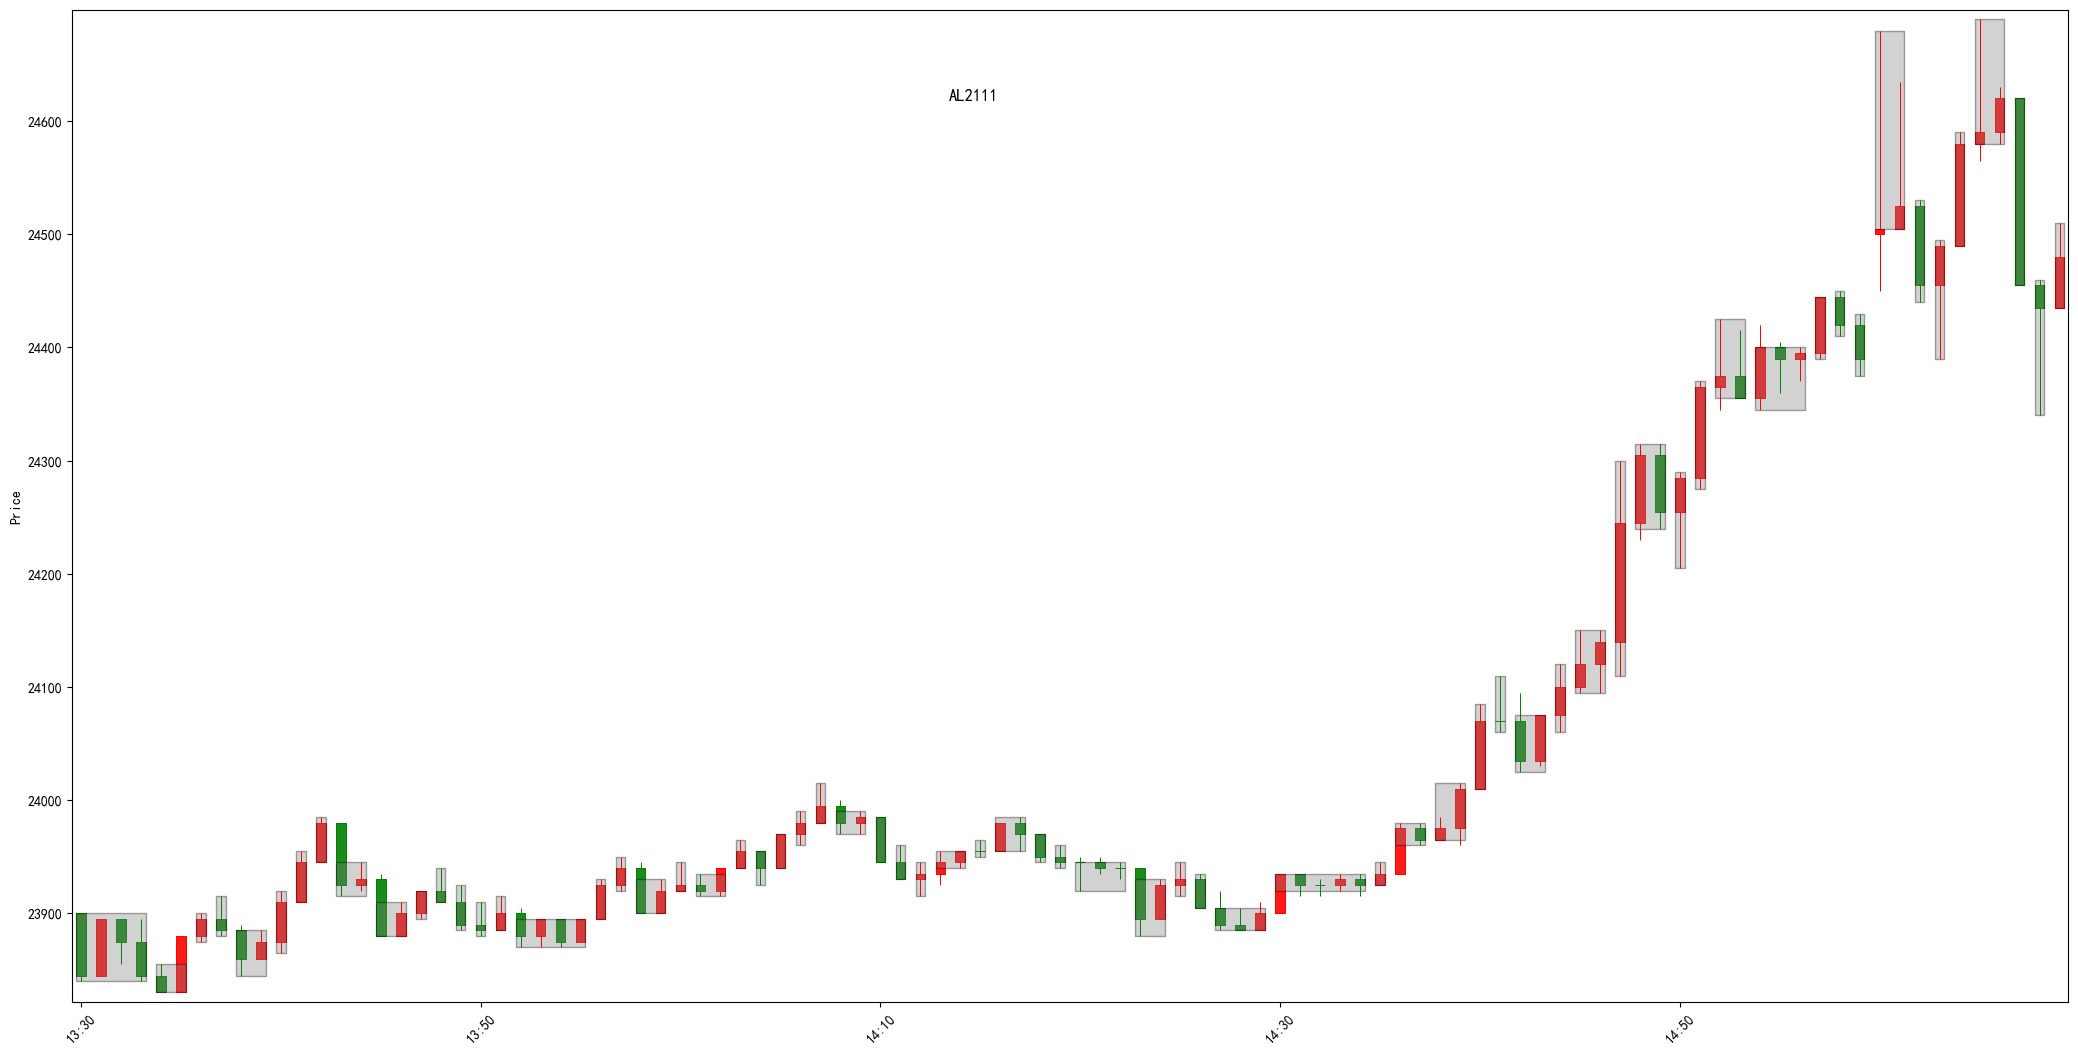

In [10]:
plot_theory_of_chan_2(
    df_ohlc,
    chan_list,
    fractal_list,
    count,
    show_all_merged=True,
    hatch_merged=True
)